In [13]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
gan_swat_network = pd.read_csv("gan_lstm_swat_network.csv", sep=",").to_numpy()
gan_swat_sensor = pd.read_csv("gan_lstm_swat_sensor.csv", sep=",").to_numpy()
gan_wadi = pd.read_csv("gan_lstm_wadi_sensor.csv", sep=",").to_numpy()
gan_wustl = pd.read_csv("gan_lstm_wustl_network.csv", sep=",").to_numpy()

vae_swat_network = pd.read_csv("vae_swat_network.csv", sep=",").to_numpy()
vae_swat_sensor = pd.read_csv("vae_swat_sensor.csv", sep=",").to_numpy()
vae_wadi = pd.read_csv("vae_wadi_sensor.csv", sep=",").to_numpy()
vae_wustl = pd.read_csv("vae_wustl_network.csv", sep=",").to_numpy()

vae_gan_swat_network = pd.read_csv("vae_gan_swat_network.csv", sep=",").to_numpy()
vae_gan_swat_sensor = pd.read_csv("vae_gan_swat_sensor.csv", sep=",").to_numpy()
vae_gan_wadi = pd.read_csv("vae_gan_wadi_sensor.csv", sep=",").to_numpy()
vae_gan_wustl = pd.read_csv("vae_gan_wustl_network.csv", sep=",").to_numpy()

gan_softmax_swat_network = pd.read_csv("gan_softmax_swat_network_50.csv", sep=",").to_numpy()
gan_softmax_swat_sensor = pd.read_csv("gan_softmax_swat_sensor_50.csv", sep=",").to_numpy()
gan_softmax_wadi = pd.read_csv("gan_softmax_wadi_50.csv", sep=",").to_numpy()
gan_softmax_wustl = pd.read_csv("gan_softmax_wustl_50.csv", sep=",").to_numpy()

In [15]:
swat = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/swat_processed.csv", sep=",").to_numpy()[:, 1:]
# swap sport to front
swat[:, [0, 1]] = swat[:, [1, 0]]
# # swap dport to after sport
swat[:, [1, 2]] = swat[:, [2, 1]]
# # swap protocols to after dport
swat[:, [2, 14]] = swat[:, [14, 2]]

wadi = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/wadi_attacks.csv", sep=",").to_numpy()[:, 1:]
swat_sensor = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/swat_sensor.csv", sep=",").to_numpy()[:, 1:]
wustl = pd.read_csv("/home/knel/virtual_envs/ankh-morpork/ICS_data_generation/data/wustl_attacks.csv", sep=",").to_numpy()[:, 1:]

In [16]:
swat.T.shape, wadi.shape, wustl.shape, swat_sensor.shape, gan_swat_network.shape

((22, 2658168), (9977, 69), (87016, 27), (13199, 28), (5000, 23))

In [17]:
def ks(real, fake):
    ks_statistics = []
    ks_pvalues = []

    num_features = real.shape[1]
    real = real[: fake.shape[0]]

    for i in range(num_features):
        ks_feature = scipy.stats.ks_2samp(real[:, i], fake[:, i])
        ks_statistics.append(ks_feature.statistic)
        ks_pvalues.append(ks_feature.pvalue)

    return ks_statistics, ks_pvalues

In [18]:
def ks_total(real, fake):
    ks_statistics = []
    ks_pvalues = []

    num_features = real.shape[1]

    real = real[: fake.shape[0]].flatten()
    # fake = fake.flatten()
    fake = fake.flatten(order="K")
    

    return scipy.stats.ks_2samp(real, fake)

### VAE

In [19]:
ks_vae_swat_network = ks(swat, vae_swat_network)
ks_vae_swat_sensor = ks(swat_sensor, vae_swat_sensor)
ks_vae_wadi = ks(wadi, vae_wadi)
ks_vae_wustl = ks(wustl, vae_wustl)

In [20]:
np.mean(ks_vae_swat_network[0]), np.mean(ks_vae_swat_sensor[0]), np.mean(ks_vae_wadi[0]), np.mean(ks_vae_wustl[0])

(0.7031398395410102, 0.973633658008658, 0.863749237605646, 0.7948236676115324)

In [21]:
ks_total(swat, vae_swat_network), ks_total(swat_sensor, vae_swat_sensor), ks_total(wadi, vae_wadi), ks_total(wustl, vae_wustl)

(KstestResult(statistic=0.4893746962623295, pvalue=0.0, statistic_location=0.4210857, statistic_sign=-1),
 KstestResult(statistic=0.8876082251082251, pvalue=0.0, statistic_location=0.9999967, statistic_sign=-1),
 KstestResult(statistic=0.5051407162150388, pvalue=0.0, statistic_location=0.99991137, statistic_sign=-1),
 KstestResult(statistic=0.7023268384449721, pvalue=0.0, statistic_location=0.99999994, statistic_sign=-1))

In [22]:
ks_total(swat, vae_swat_network), ks_total(swat_sensor, vae_swat_sensor), ks_total(wadi, vae_wadi), ks_total(wustl, vae_wustl)

(KstestResult(statistic=0.4893746962623295, pvalue=0.0, statistic_location=0.4210857, statistic_sign=-1),
 KstestResult(statistic=0.8876082251082251, pvalue=0.0, statistic_location=0.9999967, statistic_sign=-1),
 KstestResult(statistic=0.5051407162150388, pvalue=0.0, statistic_location=0.99991137, statistic_sign=-1),
 KstestResult(statistic=0.7023268384449721, pvalue=0.0, statistic_location=0.99999994, statistic_sign=-1))

### GAN

In [23]:
ks_gan_swat_network = ks(swat, gan_swat_network)
ks_gan_swat_sensor = ks(swat_sensor, gan_swat_sensor)
ks_gan_wadi = ks(wadi, gan_wadi)
ks_gan_wustl = ks(wustl, gan_wustl)

In [24]:
np.mean(ks_gan_swat_network[0]), np.mean(ks_gan_swat_sensor[0]), np.mean(ks_gan_wadi[0]), np.mean(ks_gan_wustl[0])

(0.6982636363636363, 0.976654761904762, 0.9884637681159422, 0.8046222222222222)

In [25]:
ks_total(swat, gan_swat_network), ks_total(swat_sensor, gan_swat_sensor), ks_total(wadi, gan_wadi), ks_total(wustl, gan_wustl)

(KstestResult(statistic=0.5186814229249012, pvalue=0.0, statistic_location=0.34091458, statistic_sign=-1),
 KstestResult(statistic=0.8899523809523809, pvalue=0.0, statistic_location=0.99974245, statistic_sign=-1),
 KstestResult(statistic=0.5263623188405797, pvalue=0.0, statistic_location=0.9981534, statistic_sign=-1),
 KstestResult(statistic=0.7103121693121693, pvalue=0.0, statistic_location=0.71612895, statistic_sign=-1))

### VAE + GAN

In [26]:
ks_vae_gan_swat_network = ks(swat, vae_gan_swat_network)
ks_vae_gan_swat_sensor = ks(swat_sensor, vae_gan_swat_sensor.reshape(2640, 28))
ks_vae_gan_wadi = ks(wadi, vae_gan_wadi.reshape(1996, 69))
ks_vae_gan_wustl = ks(wustl, vae_gan_wustl.reshape(17404, 27))

In [27]:
np.mean(ks_vae_gan_swat_network[0]), np.mean(ks_vae_gan_swat_sensor[0]), np.mean(ks_vae_gan_wadi[0]), np.mean(ks_vae_gan_wustl[0])

(0.7441590909090909, 0.9880275974025974, 0.9592736197031744, 0.808492300620547)

In [28]:
ks_total(swat, vae_gan_swat_network), ks_total(swat_sensor, vae_gan_swat_sensor), ks_total(wadi, vae_gan_wadi), ks_total(wustl, vae_gan_wustl)

(KstestResult(statistic=0.546251976284585, pvalue=0.0, statistic_location=0.45913413, statistic_sign=-1),
 KstestResult(statistic=0.9050577424696676, pvalue=0.0, statistic_location=0.7679304, statistic_sign=-1),
 KstestResult(statistic=0.5472776073942214, pvalue=0.0, statistic_location=0.583183, statistic_sign=-1),
 KstestResult(statistic=0.7048137607079001, pvalue=0.0, statistic_location=0.87098086, statistic_sign=-1))

### GAN Softmax

In [29]:
ks_gan_softmax_swat_network = ks(swat, gan_softmax_swat_network)
ks_gan_softmax_swat_sensor = ks(swat_sensor, gan_softmax_swat_sensor)
ks_gan_softmax_wadi = ks(wadi, gan_softmax_wadi)
ks_gan_softmax_wustl = ks(wustl, gan_softmax_wustl)

In [30]:
np.mean(ks_gan_softmax_swat_network[0]), np.mean(ks_gan_softmax_swat_sensor[0]), np.mean(ks_gan_softmax_wadi[0]), np.mean(ks_gan_softmax_wustl[0])

(0.8754636363636362, 0.9658285714285714, 0.945544927536232, 0.8778148148148148)

### Plots

#### SWaT

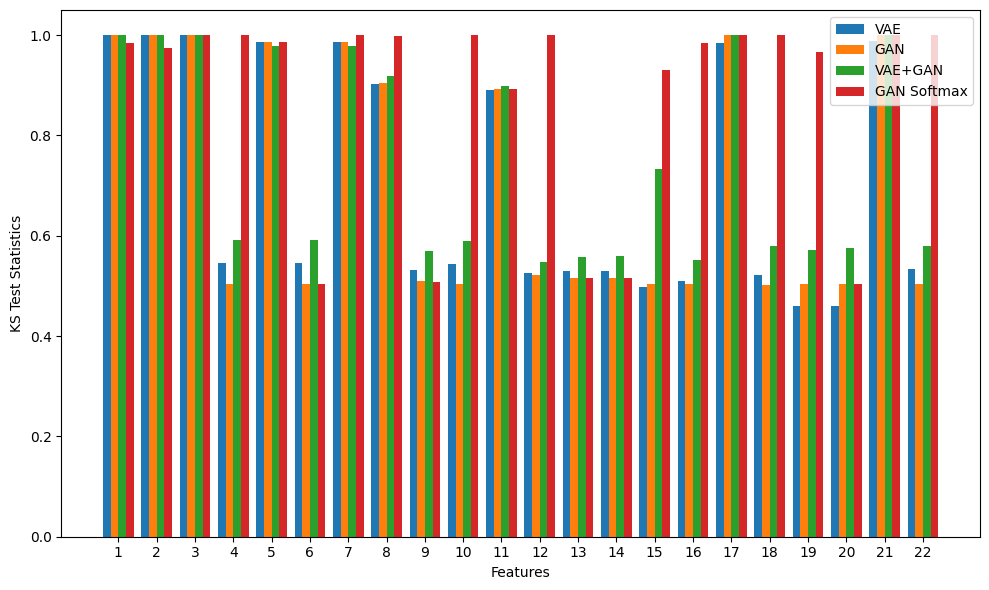

In [48]:
X = np.arange(1, swat.shape[1] + 1) 
  
X_axis = np.arange(len(X)) 

bar_width = 0.2

plt.figure(figsize=(10,6))
  
plt.bar(X_axis - 1.5*bar_width, ks_vae_swat_network[0], bar_width, label="VAE")  
plt.bar(X_axis - 0.5*bar_width, ks_gan_swat_network[0], bar_width, label = "GAN")
plt.bar(X_axis + 0.5*bar_width, ks_vae_gan_swat_network[0], bar_width, label = "VAE+GAN") 
plt.bar(X_axis + 1.5*bar_width, ks_gan_softmax_swat_network[0], bar_width, label = "GAN Softmax") 
  
plt.xticks(X_axis, X) 
plt.xlabel("Features") 
plt.ylabel("KS Test Statistics") 
plt.tight_layout()
plt.legend() 
plt.show() 

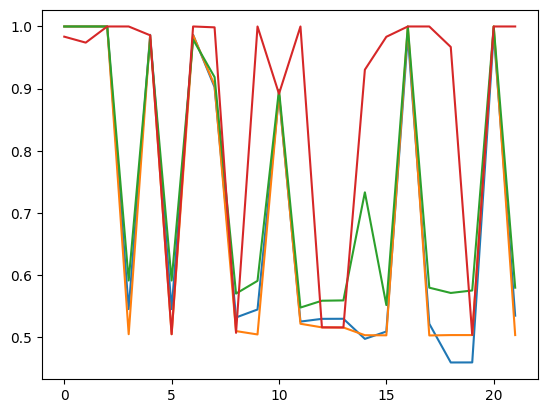

In [51]:
plt.plot(ks_vae_swat_network[0])
plt.plot(ks_gan_swat_network[0])
plt.plot(ks_vae_gan_swat_network[0])
plt.plot(ks_gan_softmax_swat_network[0])

#### SWaT Sensor

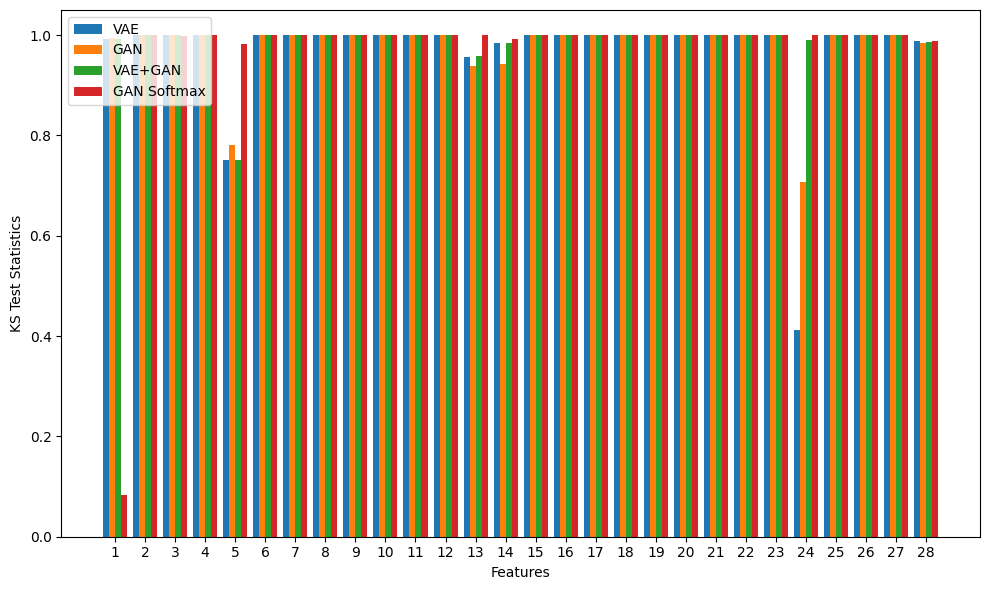

In [49]:
X = np.arange(1, swat_sensor.shape[1] + 1) 
  
X_axis = np.arange(len(X)) 

bar_width = 0.2

plt.figure(figsize=(10,6))
  
plt.bar(X_axis - 1.5*bar_width, ks_vae_swat_sensor[0], bar_width, label="VAE")  
plt.bar(X_axis - 0.5*bar_width, ks_gan_swat_sensor[0], bar_width, label = "GAN")
plt.bar(X_axis + 0.5*bar_width, ks_vae_gan_swat_sensor[0], bar_width, label = "VAE+GAN") 
plt.bar(X_axis + 1.5*bar_width, ks_gan_softmax_swat_sensor[0], bar_width, label = "GAN Softmax") 
  
plt.xticks(X_axis, X) 
plt.xlabel("Features") 
plt.ylabel("KS Test Statistics") 
plt.tight_layout()
plt.legend() 
plt.show() 

#### WADI

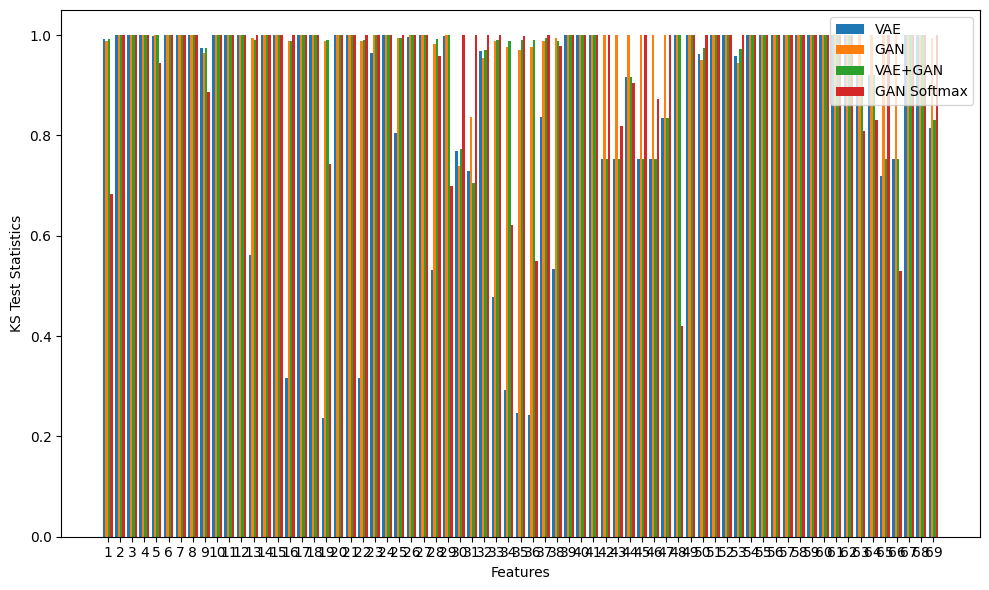

In [53]:
X = np.arange(1, wadi.shape[1] + 1) 
  
X_axis = np.arange(len(X)) 

bar_width = 0.2

plt.figure(figsize=(10,6))
  
plt.bar(X_axis - 1.5*bar_width, ks_vae_wadi[0], bar_width, label="VAE")  
plt.bar(X_axis - 0.5*bar_width, ks_gan_wadi[0], bar_width, label = "GAN")
plt.bar(X_axis + 0.5*bar_width, ks_vae_gan_wadi[0], bar_width, label = "VAE+GAN") 
plt.bar(X_axis + 1.5*bar_width, ks_gan_softmax_wadi[0], bar_width, label = "GAN Softmax") 
  
plt.xticks(X_axis, X) 
plt.xlabel("Features") 
plt.ylabel("KS Test Statistics") 
plt.tight_layout()
plt.legend() 
plt.show() 

#### WUSTL

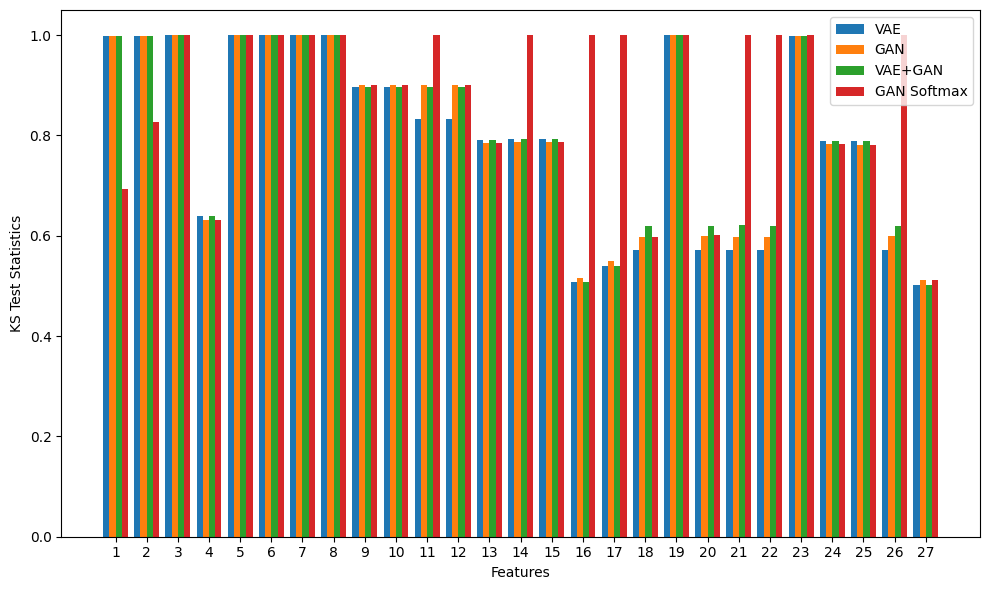

In [54]:
X = np.arange(1, wustl.shape[1] + 1) 
  
X_axis = np.arange(len(X)) 

bar_width = 0.2

plt.figure(figsize=(10,6))
  
plt.bar(X_axis - 1.5*bar_width, ks_vae_wustl[0], bar_width, label="VAE")  
plt.bar(X_axis - 0.5*bar_width, ks_gan_wustl[0], bar_width, label = "GAN")
plt.bar(X_axis + 0.5*bar_width, ks_vae_gan_wustl[0], bar_width, label = "VAE+GAN") 
plt.bar(X_axis + 1.5*bar_width, ks_gan_softmax_wustl[0], bar_width, label = "GAN Softmax") 
  
plt.xticks(X_axis, X) 
plt.xlabel("Features") 
plt.ylabel("KS Test Statistics") 
plt.tight_layout()
plt.legend() 
plt.show() 

In [11]:
kernel = scipy.stats.gaussian_kde(vae_swat_network.T)
print(kernel)